### DEIT-III Pre-trained Artifacts

In [1]:
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt



In [2]:
from models_v2 import *

In [3]:
chosen_one = deit_small_patch16_LS(pretrained=True, img_size=384, pretrained_21k = True)

In [ ]:
chosen_one = deit_base_patch16_LS(pretrained=True, img_size=384, pretrained_21k = True) 

In [ ]:
chosen_one

In [17]:
def show_artifacts(test_model, test_image):
    """
    Generate the Attention maps and the norm values for the DEIT-III model

    test_model: DEIT-III model to be tested,
    test_image:  Image of the correct size for the corresponding model, and batch dimension is accounted for

    """

    test_model(test_image)

    ## Norm of feature values after MLP
    output = chosen_one.block_output['final']
    output = output.squeeze(0)
    output = output[1:]
    #output.shape
    # copmute norm of all output elements
    output_norms = output.norm(dim=-1)
    #output_norms.shape
    
    plt.imshow(output_norms.reshape(24, 24).detach().numpy())
    plt.axis('off')  # Turn off axis labels
    plt.colorbar(label='Norm Values')  # Add a colorbar as a legend
    plt.show()

    plt.hist(output_norms.detach().numpy(), bins=50)
    plt.xlabel('Norm Values')
    plt.ylabel('Frequency')
    plt.show()

    ## Attention maps for the last Attention Head
    attn_map_mean = chosen_one.blocks[len(test_model.blocks)-1].attn.attn_map.squeeze(0).mean(dim=0)
    attn_map_mean = attn_map_mean[0][1:]
    #attn_map_mean.shape

    plt.imshow(attn_map_mean.reshape(24, 24).detach().numpy())
    plt.axis('off') 
    plt.colorbar(label='CLS attention map')  
    plt.show()
    

    
    



In [21]:
transform = transforms.Compose([
    transforms.Resize((384, 384)),  # Resize to match model input
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
image = train_dataset[0][0]
image.shape


Files already downloaded and verified


torch.Size([3, 384, 384])

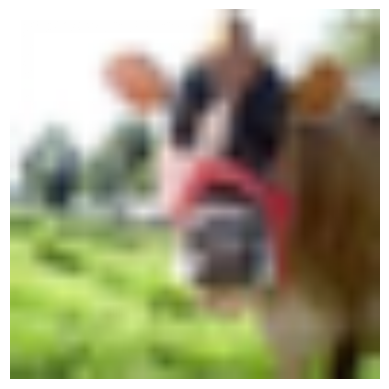

In [8]:
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Assume `image_tensor` is a tensor of shape (3, H, W), e.g., (3, 32, 32)
def plot_image(image_tensor):
    # Undo normalization if needed (optional step)

    # Convert tensor to NumPy format
    image_np = image_tensor.permute(1, 2, 0).numpy()  # Rearrange to (H, W, C)

    # Clip values to the valid range [0, 1]
    image_np = image_np.clip(0, 1)

    # Plot the image
    plt.imshow(image_np)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Example: Plot a single image from CIFAR-100
import torchvision

plot_image(image)


### Nice stuff

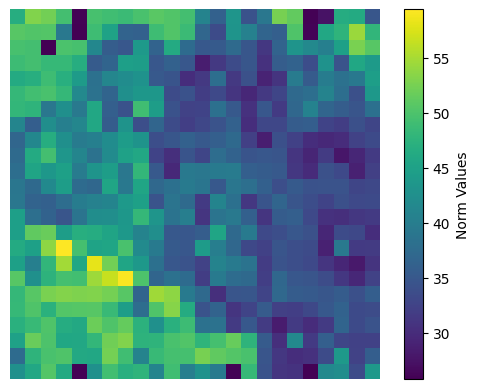

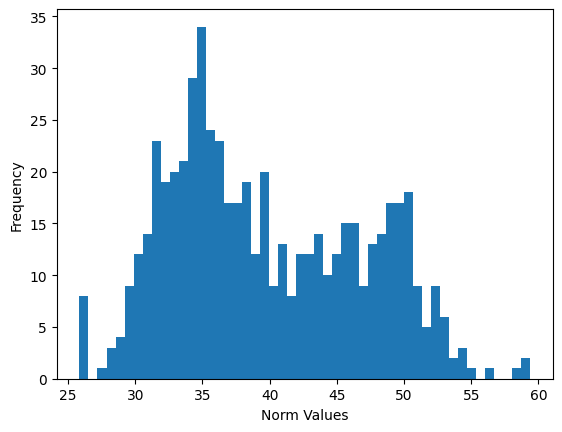

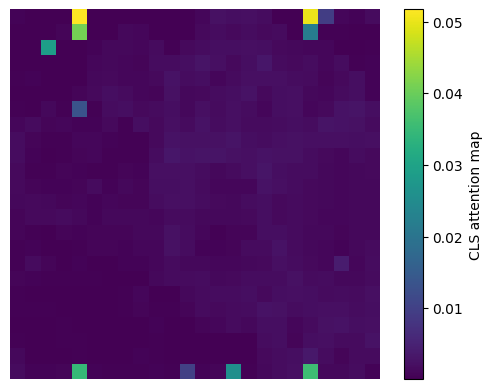

In [19]:
show_artifacts(chosen_one, image.unsqueeze(0))

In [13]:
from PIL import Image
import numpy as np
import torch

# Open the image
img = Image.open('test.png').convert('RGB')

# Resize the image to 384x384
img = img.resize((384, 384))

# Convert the image to a NumPy array and transpose the dimensions
img = np.array(img).transpose(2, 0, 1)

# Convert the NumPy array to a PyTorch tensor and normalize the values
img = torch.tensor(img).float() / 255.0

# Add a batch dimension
img = img.unsqueeze(0)

img.shape


torch.Size([1, 3, 384, 384])

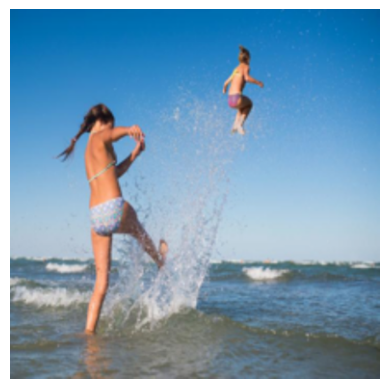

In [14]:
plot_image(img.squeeze(0))

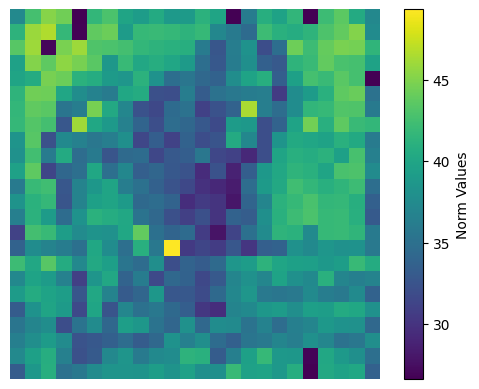

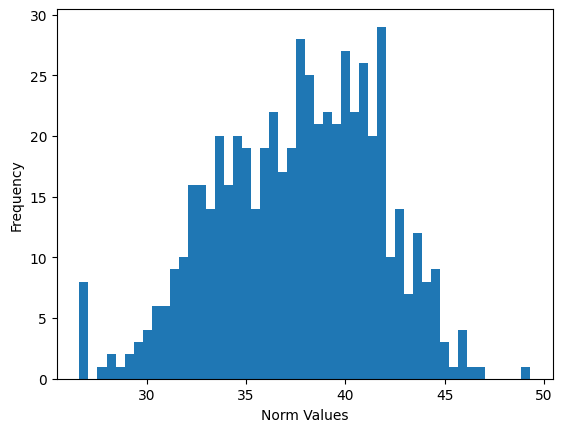

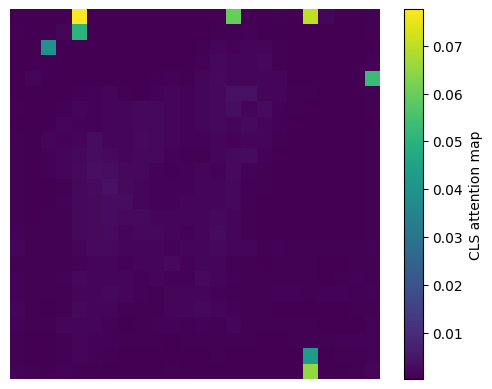

In [20]:
show_artifacts(test_model=chosen_one, test_image=img)

In [ ]:
chosen_one(img).shape

In [ ]:
output = chosen_one.block_output['final']
output = output.squeeze(0)
output.shape

In [ ]:
24*24

In [ ]:
#remove first output element
output = output[1:]
output.shape

In [ ]:
# copmute norm of all output elements
output_norms = output.norm(dim=-1)
output_norms.shape

In [ ]:
plt.imshow(output_norms.reshape(24, 24).detach().numpy())
plt.axis('off')  # Turn off axis labels
plt.colorbar(label='Norm Values')  # Add a colorbar as a legend
plt.show()

In [ ]:
# find histogram of norm values
plt.hist(output_norms.detach().numpy(), bins=50)
plt.xlabel('Norm Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
output = chosen_one.blocks[11].attn_output
output = output.squeeze(0)
output.shape

In [ ]:
24*24

In [ ]:
#remove first output element
output = output[1:]
output.shape

In [ ]:
# copmute norm of all output elements
output_norms = output.norm(dim=-1)
output_norms.shape

In [ ]:
plt.imshow(output_norms.reshape(24, 24).detach().numpy())
plt.axis('off')  # Turn off axis labels
plt.colorbar(label='Norm Values')  # Add a colorbar as a legend
plt.show()

In [ ]:
# find histogram of norm values
plt.hist(output_norms.detach().numpy(), bins=50)
plt.xlabel('Norm Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
chosen_one.blocks[11].attn.attn_map.shape

In [ ]:
attn_map_mean = chosen_one.blocks[11].attn.attn_map.squeeze(0).mean(dim=0)
attn_map_mean = attn_map_mean[0][1:]
attn_map_mean.shape

In [ ]:
plt.imshow(attn_map_mean.reshape(24, 24).detach().numpy())
plt.axis('off')  # Turn off axis labels
plt.colorbar(label='CLS attention map')  # Add a colorbar as a legend
plt.show()